In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Travail à faire
Vous êtes missionné sur le projet de nettoyage et exploration des données en interne, afin de déterminer la faisabilité de cette idée d’application de Santé publique France.

## Analyse multivariée ACP 

In [2]:
prod = pd.read_csv('prud.csv')
prod.head()

,product_name,fiber_100g,proteins_100g,fructose_100g,fat_100g,carbohydrates_100g,sugars_100g,sodium_100g,nutrition-score-fr_100g,pnns_groups_1
0,Filet de bœuf,0.0,7.502767,33.611538,9.80,28.20101,15.147243,0.255906,11.0,unknown
1,Lion Peanut x2,2.5,2.500000,33.611538,20.00,70.00000,57.500000,0.038000,22.0,unknown
2,Twix x2,0.0,7.502767,33.611538,9.80,28.20101,15.147243,0.255906,11.0,unknown
3,Pack de 2 Twix,6.2,6.250000,33.611538,4.17,77.08000,15.147243,0.255906,11.0,unknown
4,Salade Cesar,2.0,22.000000,33.611538,12.00,23.00000,0.000000,0.850000,6.0,Fruits and vegetables


In [3]:
prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_name             20 non-null     object 
 1   fiber_100g               20 non-null     float64
 2   proteins_100g            20 non-null     float64
 3   fructose_100g            20 non-null     float64
 4   fat_100g                 20 non-null     float64
 5   carbohydrates_100g       20 non-null     float64
 6   sugars_100g              20 non-null     float64
 7   sodium_100g              20 non-null     float64
 8   nutrition-score-fr_100g  20 non-null     float64
 9   pnns_groups_1            20 non-null     object 
dtypes: float64(8), object(2)
memory usage: 1.7+ KB


In [4]:
del prod['pnns_groups_1']
prod = prod.set_index('product_name', drop=True)
prod

,fiber_100g,proteins_100g,fructose_100g,fat_100g,carbohydrates_100g,sugars_100g,sodium_100g,nutrition-score-fr_100g
product_name,,,,,,,,
Filet de bœuf,0.000,7.502767,33.611538,9.80,28.20101,15.147243,0.255906,11.0
Lion Peanut x2,2.500,2.500000,33.611538,20.00,70.00000,57.500000,0.038000,22.0
Twix x2,0.000,7.502767,33.611538,9.80,28.20101,15.147243,0.255906,11.0
Pack de 2 Twix,6.200,6.250000,33.611538,4.17,77.08000,15.147243,0.255906,11.0
Salade Cesar,2.000,22.000000,33.611538,12.00,23.00000,0.000000,0.850000,6.0
Danoises à la cannelle roulées,2.050,4.790000,33.611538,14.40,54.10000,28.100000,0.363000,11.0
Flute,0.000,7.502767,33.611538,9.80,28.20101,15.147243,0.255906,11.0
Chaussons tressés aux pommes,2.000,3.330000,33.611538,10.70,38.70000,24.700000,0.255000,9.0
Pain Burger Artisan,2.220,10.000000,33.611538,1.11,53.30000,1.110000,0.600000,1.0


In [5]:
prod.describe()

,fiber_100g,proteins_100g,fructose_100g,fat_100g,carbohydrates_100g,sugars_100g,sodium_100g,nutrition-score-fr_100g
count,20.000000,20.000000,2.000000e+01,20.000000,20.000000,20.000000,20.000000,20.000000
mean,1.336350,8.032607,3.361154e+01,10.253500,36.942404,20.674821,0.254851,11.000000
std,1.925066,7.446906,1.458003e-14,6.909718,19.082215,16.360297,0.192877,5.438653
min,0.000000,0.000000,3.361154e+01,0.000000,7.860000,0.000000,0.010000,1.000000
25%,0.000000,4.500000,3.361154e+01,7.000000,28.201010,15.147243,0.166685,10.000000
50%,0.000000,7.502767,3.361154e+01,9.800000,28.201010,15.147243,0.255906,11.000000
75%,2.092500,7.502767,3.361154e+01,10.325000,53.875000,25.550000,0.255906,11.000000
max,6.200000,33.900000,3.361154e+01,33.300000,77.080000,57.500000,0.850000,26.000000


In [6]:
prod.isna().sum()

fiber_100g                 0
proteins_100g              0
fructose_100g              0
fat_100g                   0
carbohydrates_100g         0
sugars_100g                0
sodium_100g                0
nutrition-score-fr_100g    0
dtype: int64

In [7]:
X = prod.values
X[:5]

array([[0.00000000e+00, 7.50276688e+00, 3.36115385e+01, 9.80000000e+00,
        2.82010096e+01, 1.51472426e+01, 2.55905512e-01, 1.10000000e+01],
       [2.50000000e+00, 2.50000000e+00, 3.36115385e+01, 2.00000000e+01,
        7.00000000e+01, 5.75000000e+01, 3.80000000e-02, 2.20000000e+01],
       [0.00000000e+00, 7.50276688e+00, 3.36115385e+01, 9.80000000e+00,
        2.82010096e+01, 1.51472426e+01, 2.55905512e-01, 1.10000000e+01],
       [6.20000000e+00, 6.25000000e+00, 3.36115385e+01, 4.17000000e+00,
        7.70800000e+01, 1.51472426e+01, 2.55905512e-01, 1.10000000e+01],
       [2.00000000e+00, 2.20000000e+01, 3.36115385e+01, 1.20000000e+01,
        2.30000000e+01, 0.00000000e+00, 8.50000000e-01, 6.00000000e+00]])

In [8]:
type(X)

numpy.ndarray

In [9]:
ccod = prod.index
ccod

Index(['Filet de bœuf', 'Lion Peanut x2', 'Twix x2', 'Pack de 2 Twix',
       'Salade Cesar', 'Danoises à la cannelle roulées', 'Flute',
       'Chaussons tressés aux pommes', 'Pain Burger Artisan',
       'lentilles vertes ', 'Biscuits sablés fourrage au cacao',
       'Quiche Lorraine', 'Pâté au poulet',
       'Thé de Noël aromatisé orange-cannelle', 'Sirops pour ganache macarons',
       'Belgische Pralinen', 'Luxury Christmas Pudding',
       'Luxury Christmas Pudding', 'Pepsi, Nouveau goût !', 'Diet Coke'],
      dtype='object', name='product_name')

In [10]:
features = prod.columns
features

Index(['fiber_100g', 'proteins_100g', 'fructose_100g', 'fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'sodium_100g',
       'nutrition-score-fr_100g'],
      dtype='object')

In [11]:
scaler = StandardScaler()

In [12]:
scaler.fit(X)

StandardScaler()

In [13]:
X_scaled = scaler.transform(X)
X_scaled[:5]

array([[-7.12217649e-01, -7.29973278e-02,  7.10542736e-15,
        -6.73372173e-02, -4.69991630e-01, -3.46642622e-01,
         5.60854669e-03,  0.00000000e+00],
       [ 6.20175902e-01, -7.62240692e-01,  7.10542736e-15,
         1.44719336e+00,  1.77738163e+00,  2.30936133e+00,
        -1.15350367e+00,  2.07510236e+00],
       [-7.12217649e-01, -7.29973278e-02,  7.10542736e-15,
        -6.73372173e-02, -4.69991630e-01, -3.46642622e-01,
         5.60854669e-03,  0.00000000e+00],
       [ 2.59211836e+00, -2.45594069e-01,  7.10542736e-15,
        -9.03298702e-01,  2.15804639e+00, -3.46642622e-01,
         5.60854669e-03,  0.00000000e+00],
       [ 3.53697192e-01,  1.92432175e+00,  7.10542736e-15,
         2.59326240e-01, -7.49630202e-01, -1.29654857e+00,
         3.16579560e+00, -9.43228347e-01]])

In [14]:
X_scaled = scaler.fit_transform(X)

In [15]:
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7
mean,0.00,-0.00,0.0,-0.00,-0.00,0.00,-0.00,0.00
std,1.03,1.03,0.0,1.03,1.03,1.03,1.03,1.03


In [16]:
n_components = 8

In [17]:
pca = PCA(n_components=n_components)

In [18]:
pca.fit(X_scaled)

PCA(n_components=8)

In [19]:
pca.explained_variance_ratio_

array([4.73357586e-01, 2.48486721e-01, 1.68119738e-01, 6.58340414e-02,
       2.34559077e-02, 1.12847278e-02, 9.46127875e-03, 1.88374266e-34])

In [20]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([47.34, 24.85, 16.81,  6.58,  2.35,  1.13,  0.95,  0.  ])

In [21]:
scree_cum = scree.cumsum().round()
scree_cum

array([ 47.,  72.,  89.,  96.,  98.,  99., 100., 100.])

In [22]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6, 7, 8]

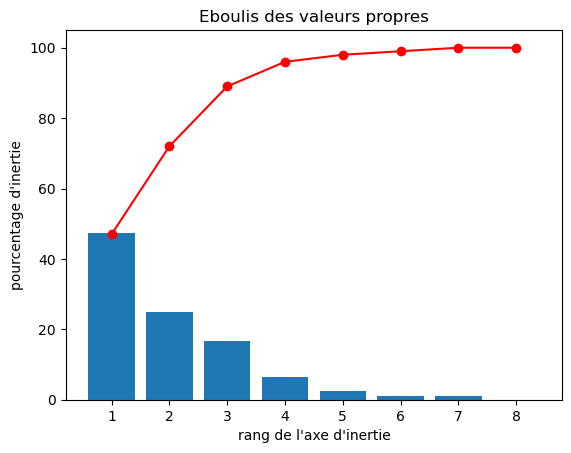

In [23]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

On a en bleu la variance de chaque nouvelle composante, et en rouge la variance cumulée.

On voit ici que plus de 70% de la variance est comprise dans les 2 premières composantes, et plus de 90% dans les 4 premières.

In [24]:
pcs = pca.components_
pcs

array([[ 1.70463559e-01, -2.84598709e-01,  1.11022302e-16,
         3.52599921e-01,  3.73060452e-01,  5.19878345e-01,
        -3.80193916e-01,  4.60026127e-01],
       [ 6.84258233e-01, -1.66915974e-01, -0.00000000e+00,
        -3.97479269e-01,  4.63882421e-01,  1.67617390e-02,
         1.36623258e-01, -3.34374323e-01],
       [ 1.60616883e-01,  6.33147605e-01, -2.77555756e-17,
         4.27362790e-01,  2.80336408e-01,  9.20712832e-02,
         5.38224407e-01,  1.18051840e-01],
       [ 2.26562484e-01,  6.71896812e-01, -4.16333634e-17,
        -3.50220618e-01, -1.95369962e-01,  2.22954796e-01,
        -5.31143389e-01,  6.76614421e-02],
       [-1.45585263e-01,  7.16119948e-02, -1.31838984e-16,
        -3.78116587e-01,  3.97805829e-01, -5.10658455e-01,
        -1.13698536e-03,  6.41624246e-01],
       [ 6.27854302e-01, -1.46448985e-01, -1.16573418e-15,
         1.89037682e-01, -5.55795771e-01, -2.89887389e-01,
         8.96126243e-02,  3.84242587e-01],
       [ 1.01036677e-01,  1.106608

In [25]:
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6,7
0,0.170464,-2.845987e-01,1.110223e-16,3.525999e-01,3.730605e-01,5.198783e-01,-3.801939e-01,4.600261e-01
1,0.684258,-1.669160e-01,-0.000000e+00,-3.974793e-01,4.638824e-01,1.676174e-02,1.366233e-01,-3.343743e-01
2,0.160617,6.331476e-01,-2.775558e-17,4.273628e-01,2.803364e-01,9.207128e-02,5.382244e-01,1.180518e-01
3,0.226562,6.718968e-01,-4.163336e-17,-3.502206e-01,-1.953700e-01,2.229548e-01,-5.311434e-01,6.766144e-02
4,-0.145585,7.161199e-02,-1.318390e-16,-3.781166e-01,3.978058e-01,-5.106585e-01,-1.136985e-03,6.416242e-01
5,0.627854,-1.464490e-01,-1.165734e-15,1.890377e-01,-5.557958e-01,-2.898874e-01,8.961262e-02,3.842426e-01
6,0.101037,1.106609e-01,6.959711e-15,4.834074e-01,2.484405e-01,-5.713605e-01,-5.069084e-01,-3.142156e-01
7,-0.000000,-8.588346e-16,1.000000e+00,-3.276564e-15,-2.273122e-15,3.473014e-15,3.437835e-15,2.800099e-15


In [26]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,fiber_100g,proteins_100g,fructose_100g,fat_100g,carbohydrates_100g,sugars_100g,sodium_100g,nutrition-score-fr_100g
F1,0.17,-0.28,0.0,0.35,0.37,0.52,-0.38,0.46
F2,0.68,-0.17,-0.0,-0.40,0.46,0.02,0.14,-0.33
F3,0.16,0.63,-0.0,0.43,0.28,0.09,0.54,0.12
F4,0.23,0.67,-0.0,-0.35,-0.20,0.22,-0.53,0.07
F5,-0.15,0.07,-0.0,-0.38,0.40,-0.51,-0.00,0.64
F6,0.63,-0.15,-0.0,0.19,-0.56,-0.29,0.09,0.38
F7,0.10,0.11,0.0,0.48,0.25,-0.57,-0.51,-0.31
F8,-0.00,-0.00,1.0,-0.00,-0.00,0.00,0.00,0.00


In [27]:
pcs.T

,F1,F2,F3,F4,F5,F6,F7,F8
fiber_100g,1.704636e-01,0.684258,1.606169e-01,2.265625e-01,-1.455853e-01,6.278543e-01,1.010367e-01,-0.000000e+00
proteins_100g,-2.845987e-01,-0.166916,6.331476e-01,6.718968e-01,7.161199e-02,-1.464490e-01,1.106609e-01,-8.588346e-16
fructose_100g,1.110223e-16,-0.000000,-2.775558e-17,-4.163336e-17,-1.318390e-16,-1.165734e-15,6.959711e-15,1.000000e+00
fat_100g,3.525999e-01,-0.397479,4.273628e-01,-3.502206e-01,-3.781166e-01,1.890377e-01,4.834074e-01,-3.276564e-15
carbohydrates_100g,3.730605e-01,0.463882,2.803364e-01,-1.953700e-01,3.978058e-01,-5.557958e-01,2.484405e-01,-2.273122e-15
sugars_100g,5.198783e-01,0.016762,9.207128e-02,2.229548e-01,-5.106585e-01,-2.898874e-01,-5.713605e-01,3.473014e-15
sodium_100g,-3.801939e-01,0.136623,5.382244e-01,-5.311434e-01,-1.136985e-03,8.961262e-02,-5.069084e-01,3.437835e-15
nutrition-score-fr_100g,4.600261e-01,-0.334374,1.180518e-01,6.766144e-02,6.416242e-01,3.842426e-01,-3.142156e-01,2.800099e-15


<AxesSubplot:>

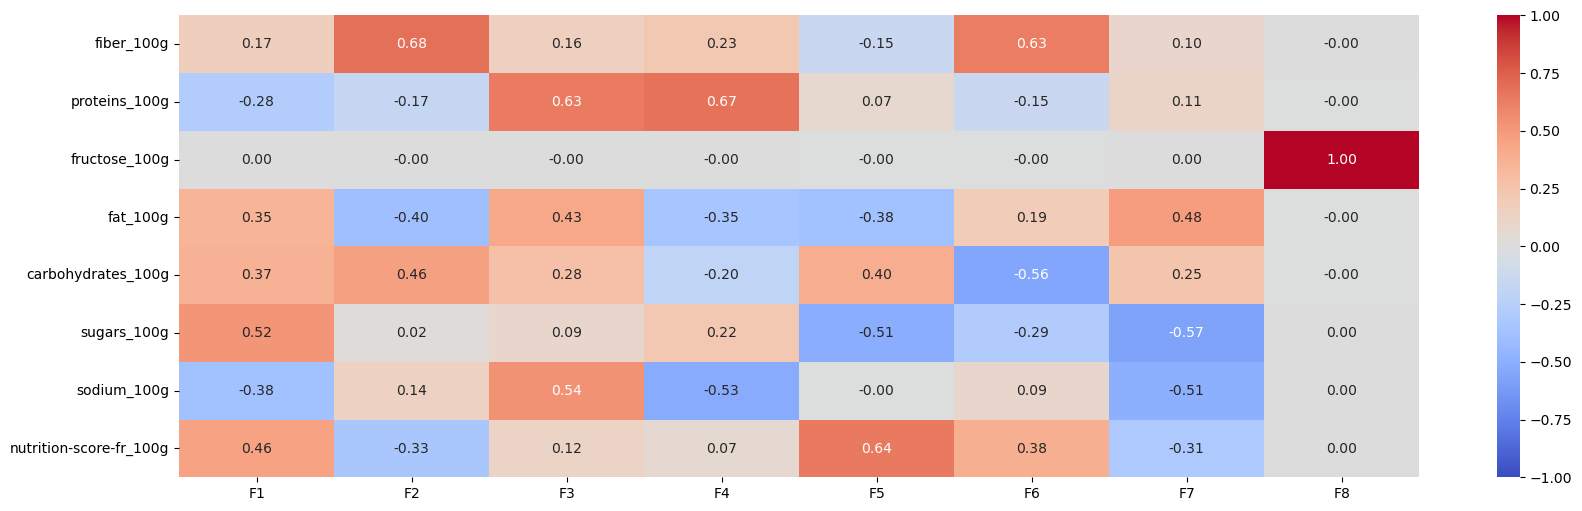

In [28]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

Graphe de correlation 

In [29]:
x, y = 0,1

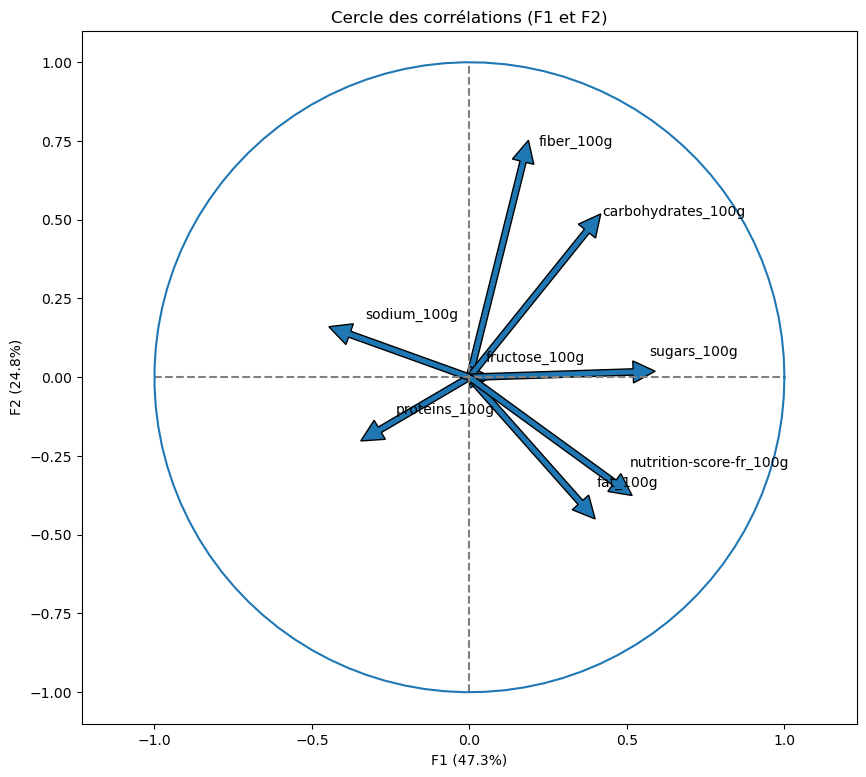

In [30]:
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

In [31]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

In [32]:
x_y = (0,1)
x_y

(0, 1)

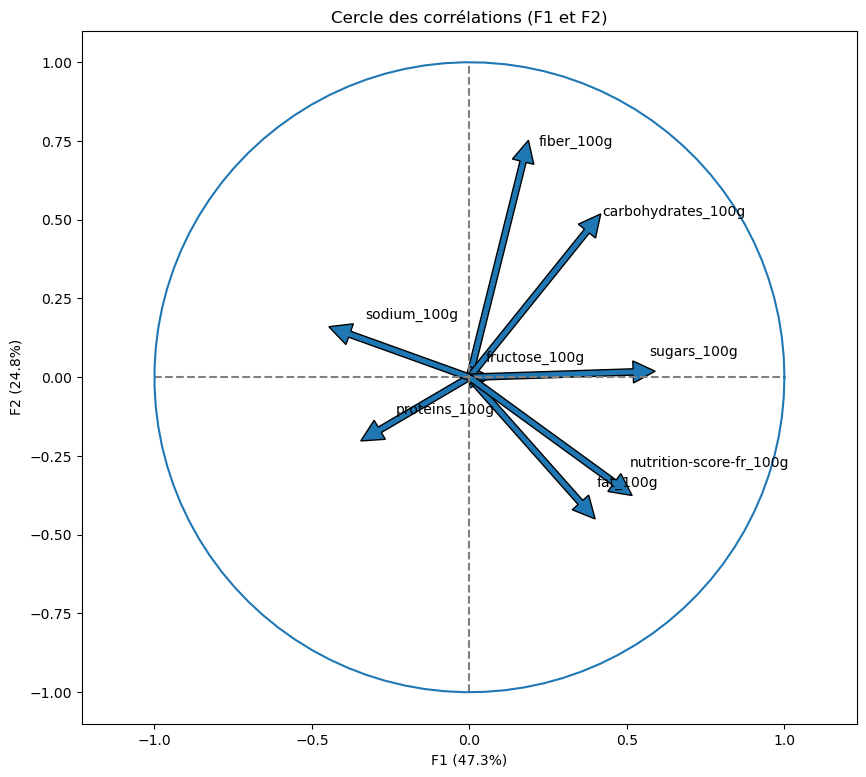

In [33]:
correlation_graph(pca, x_y, features)

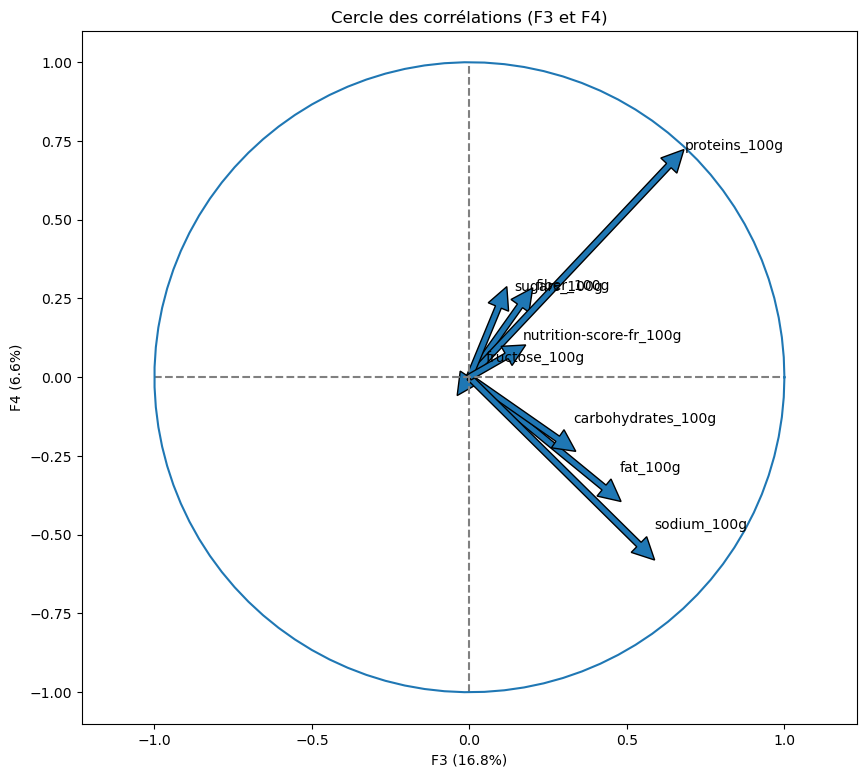

In [34]:
correlation_graph(pca, (2,3), features)

### Projection de nos dimensions. Tout d'abord Calcul les coordonnées de nos individus dans le nouvel espace

In [35]:
X_proj = pca.transform(X_scaled)
X_proj[:5]

array([[-4.82054926e-01, -6.71456152e-01, -3.50042623e-01,
        -1.75267921e-01,  1.13966427e-01, -8.69985200e-02,
        -3.41394090e-02,  1.67062043e-16],
       [ 4.08974449e+00, -1.18901166e-02,  5.70492911e-01,
         4.22410167e-02,  1.68423530e-01, -1.88758146e-01,
        -2.67318913e-01,  1.73799344e-15],
       [-4.82054926e-01, -6.71456152e-01, -3.50042623e-01,
        -1.75267921e-01,  1.13966427e-01, -8.69985200e-02,
        -3.41394090e-02,  1.67062043e-16],
       [ 8.15991859e-01,  3.16975012e+00,  4.50886219e-01,
         2.36734714e-01,  9.82083550e-01,  3.94239035e-01,
         5.29421019e-01, -2.91947506e-15],
       [-2.98715941e+00,  1.96183341e-01,  2.64905092e+00,
        -6.05669326e-01, -2.56655549e-01,  7.03038894e-01,
        -3.79789448e-01,  2.94104772e-15]])

In [36]:
x_y

(0, 1)

In [37]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    
   

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")

Essayons la version *simple* avec F1 et F2, les couleurs correspondent au niveau de difficulté : 

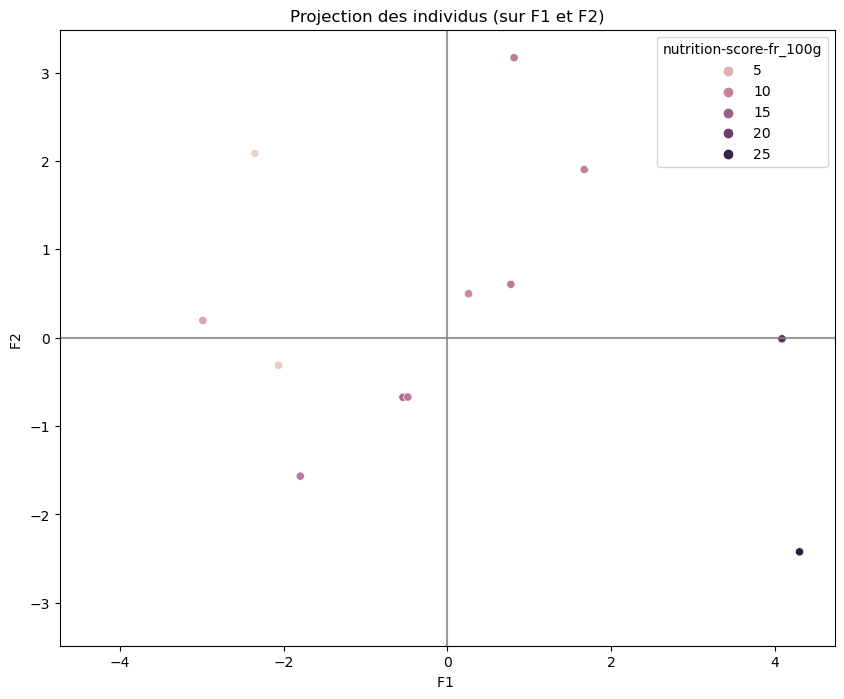

In [38]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, clusters=prod['nutrition-score-fr_100g'])

La version plus *élaborée* avec F1 et F2 

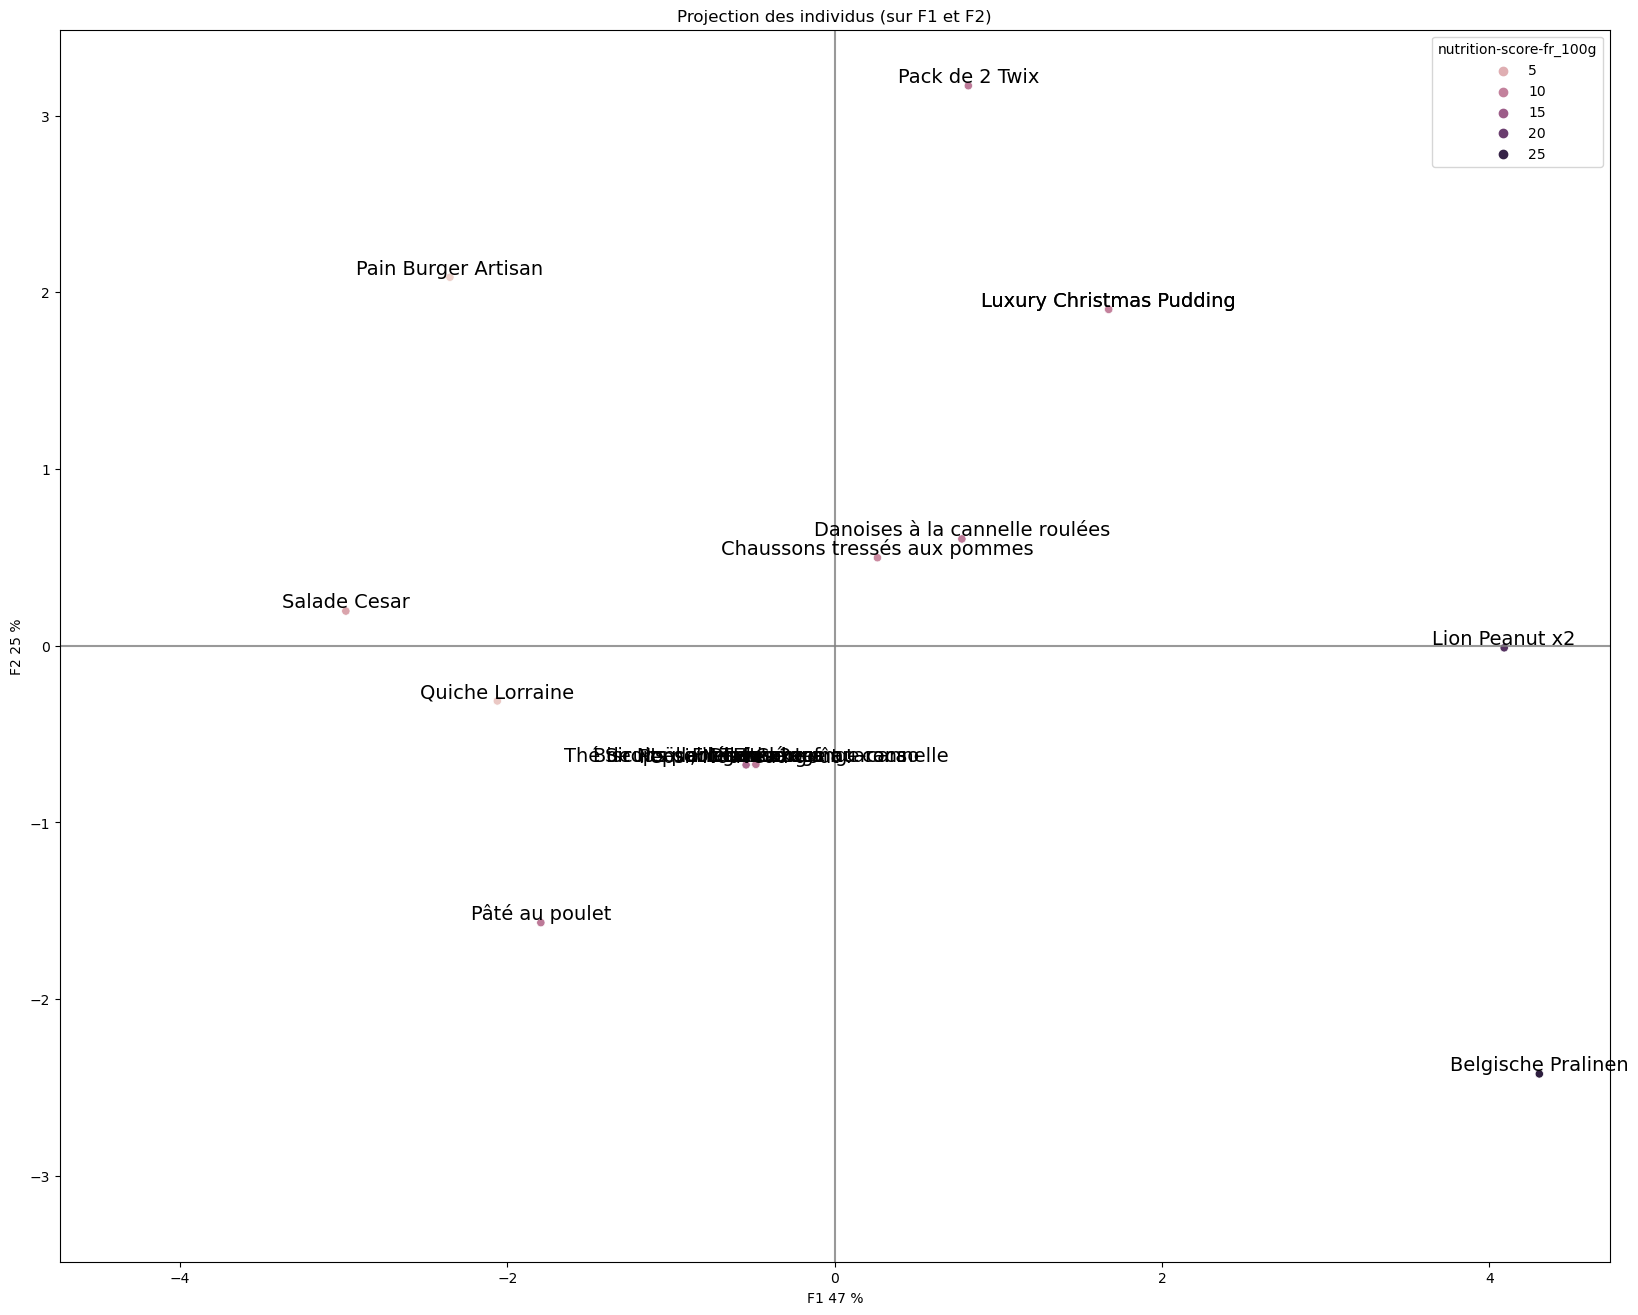

In [39]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, labels=ccod, figsize=(20,16), clusters=prod['nutrition-score-fr_100g'], marker="o")

Avec F2 et F3 

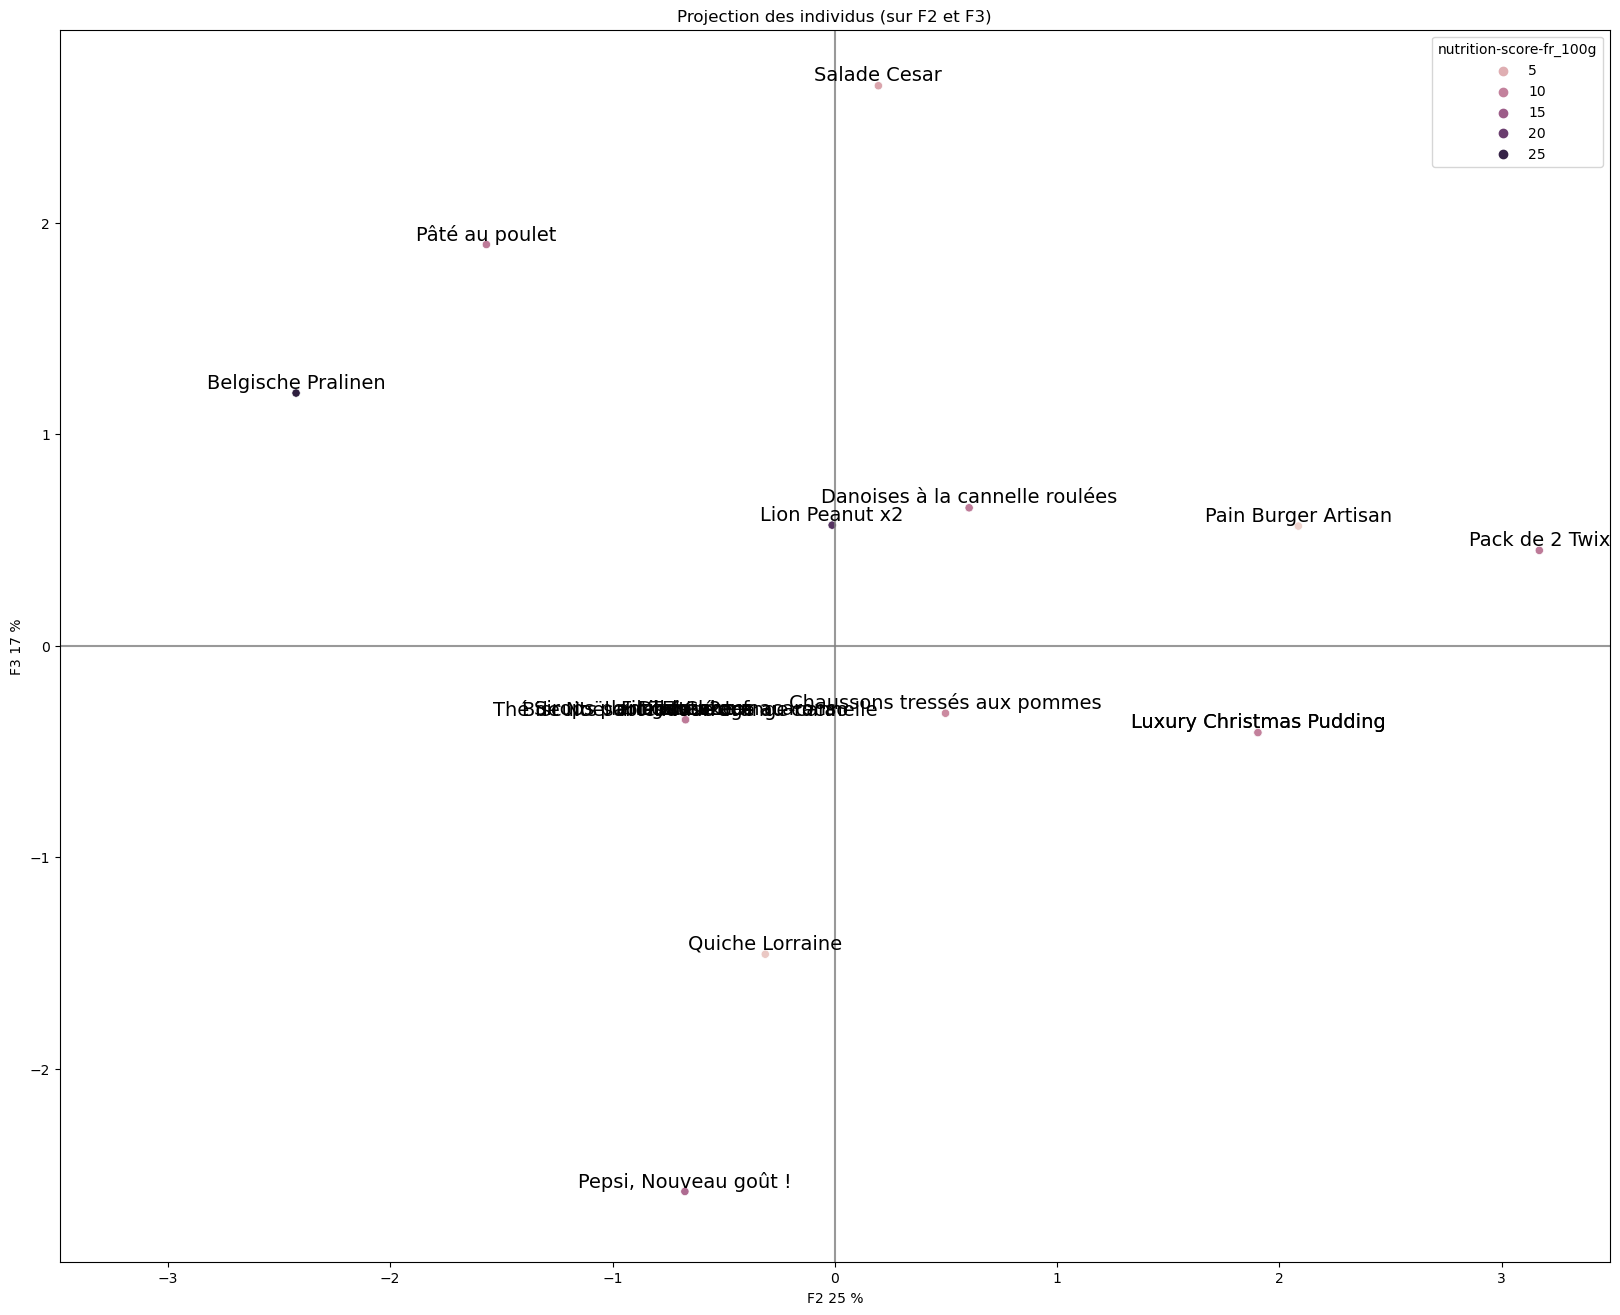

In [40]:
x_y = 1,2
display_factorial_planes(X_proj, x_y, pca, labels=ccod, figsize=(20,16), clusters=prod['nutrition-score-fr_100g'],marker="o")